### Tf-keras 和 keras 区别
- tf.kears

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn 
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_all,y_train_all,random_state=11)

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3870, 8) (3870,)
(11610, 8) (11610,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)
x_valid_s=scaler.fit_transform(x_valid)
x_test_s=scaler.transform(x_test)

In [5]:
# RandomizedSearchCV
#1. 转化为sklearn的model
#2. 定义参数集合
#3. 搜索参数

def build_model(hidden_layers=1,layer_size=30,learning_rate=3e-3):
    model=keras.models.Sequential([
        keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
        
    ])
    for _ in range(hidden_layers-1):
        model.add(keras.layers.Dense(layer_size,activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(learning_rate)
    model.compile(loss='mean_squared_error',optimizer=optimizer)
    return model
sklearn_model=keras.wrappers.scikit_learn.KerasRegressor(build_model)
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
histroy=sklearn_model.fit(x_train_s,y_train,epochs=100,validation_data=(x_valid_s,y_valid),callbacks=callbacks)




Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 78us/sample - loss: 1.4405 - val_loss: 0.6978
Epoch 2/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6123 - val_loss: 0.6089
Epoch 3/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5482 - val_loss: 0.5452
Epoch 4/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5086 - val_loss: 0.5034
Epoch 5/100
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4820 - val_loss: 0.4834
Epoch 6/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4646 - val_loss: 0.4576
Epoch 7/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4561 - val_loss: 0.4568
Epoch 8/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4470 - val_loss: 0.4373
Epoch 9/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.440

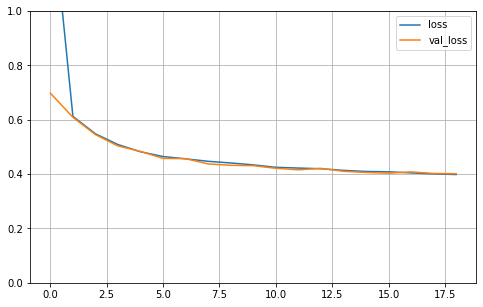

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(histroy)

In [11]:
from scipy.stats import reciprocal
param_distribution={
    "hidden_layers":[1,2,3,4],
    "layer_size":np.arange(1,100),
    "learning_rate":reciprocal(1e-4,1e-2)
}
from sklearn.model_selection import RandomizedSearchCV
random_search_cv=RandomizedSearchCV(sklearn_model,param_distribution,n_iter=10,n_jobs=1)

random_search_cv.fit(x_train_s,y_train,epochs=100,validation_data=(x_valid_s,y_valid),callbacks=callbacks)

Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 115us/sample - loss: 3.9618 - val_loss: 2.4807
Epoch 2/100
9288/9288 [==============================] - 1s 70us/sample - loss: 1.6533 - val_loss: 1.3438
Epoch 3/100
9288/9288 [==============================] - 1s 70us/sample - loss: 1.1349 - val_loss: 1.0838
Epoch 4/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.9629 - val_loss: 0.9442
Epoch 5/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.8549 - val_loss: 0.8549
Epoch 6/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.7823 - val_loss: 0.7949
Epoch 7/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.7338 - val_loss: 0.7552
Epoch 8/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.6982 - val_loss: 0.7250
Epoch 9/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.6709 - val_loss: 0.70

9288/9288 [==============================] - 0s 52us/sample - loss: 0.6006 - val_loss: 0.6257
Epoch 19/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.5922 - val_loss: 0.6170
Epoch 20/100
9288/9288 [==============================] - 0s 51us/sample - loss: 0.5842 - val_loss: 0.6104
Epoch 21/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.5766 - val_loss: 0.6004
Epoch 22/100
9288/9288 [==============================] - 1s 54us/sample - loss: 0.5692 - val_loss: 0.5929
Epoch 23/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.5620 - val_loss: 0.5849
Epoch 24/100
9288/9288 [==============================] - 0s 53us/sample - loss: 0.5552 - val_loss: 0.5778
Epoch 25/100
9288/9288 [==============================] - 1s 54us/sample - loss: 0.5487 - val_loss: 0.5711
Epoch 26/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.5425 - val_loss: 0.5651
Epoch 27/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 52us/sample - loss: 0.4838 - val_loss: 0.4979
Epoch 33/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.4807 - val_loss: 0.4947
Epoch 34/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.4776 - val_loss: 0.4919
Epoch 35/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4748 - val_loss: 0.4876
Epoch 36/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4721 - val_loss: 0.4840
Epoch 37/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4692 - val_loss: 0.4803
Epoch 38/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4668 - val_loss: 0.4779
Epoch 39/100
9288/9288 [==============================] - 1s 56us/sample - loss: 0.4643 - val_loss: 0.4748
Epoch 40/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4619 - val_loss: 0.4709
Epoch 41/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 52us/sample - loss: 0.5020 - val_loss: 0.5392
Epoch 49/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4991 - val_loss: 0.5354
Epoch 50/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4958 - val_loss: 0.5294
Epoch 51/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4931 - val_loss: 0.5283
Epoch 52/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.4903 - val_loss: 0.5228
Epoch 53/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4874 - val_loss: 0.5201
Epoch 54/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4845 - val_loss: 0.5151
Epoch 55/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.4819 - val_loss: 0.5116
Epoch 56/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4792 - val_loss: 0.5081
Epoch 57/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 52us/sample - loss: 0.4953 - val_loss: 0.5288
Epoch 43/100
9288/9288 [==============================] - 0s 54us/sample - loss: 0.4926 - val_loss: 0.5242
Epoch 44/100
9288/9288 [==============================] - 1s 56us/sample - loss: 0.4900 - val_loss: 0.5239
Epoch 45/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4875 - val_loss: 0.5184
Epoch 46/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4850 - val_loss: 0.5179
Epoch 47/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4827 - val_loss: 0.5136
Epoch 48/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4801 - val_loss: 0.5109
Epoch 49/100
9288/9288 [==============================] - 0s 54us/sample - loss: 0.4776 - val_loss: 0.5056
Epoch 50/100
9288/9288 [==============================] - 0s 53us/sample - loss: 0.4755 - val_loss: 0.5054
Epoch 51/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 45us/sample - loss: 0.4060 - val_loss: 0.4097
Epoch 20/100
2322/2322 [==============================] - 0s 21us/sample - loss: 0.4139
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 68us/sample - loss: 1.2464 - val_loss: 0.7802
Epoch 2/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6171 - val_loss: 0.5845
Epoch 3/100
9288/9288 [==============================] - 0s 47us/sample - loss: 0.5329 - val_loss: 0.5329
Epoch 4/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.4992 - val_loss: 0.5157
Epoch 5/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.4838 - val_loss: 0.4936
Epoch 6/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.4664 - val_loss: 0.4912
Epoch 7/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.4566 - val_loss: 0.4678
Epoch 8/100
9288/9288 [=====

9288/9288 [==============================] - 0s 46us/sample - loss: 0.3971 - val_loss: 0.4053
Epoch 24/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.3927 - val_loss: 0.4110
Epoch 25/100
9288/9288 [==============================] - 0s 47us/sample - loss: 0.3914 - val_loss: 0.4049
Epoch 26/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.3875 - val_loss: 0.4103
Epoch 27/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.3893 - val_loss: 0.4056
Epoch 28/100
2322/2322 [==============================] - 0s 21us/sample - loss: 0.4058
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 68us/sample - loss: 2.0342 - val_loss: 0.8413
Epoch 2/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.7028 - val_loss: 0.7066
Epoch 3/100
9288/9288 [==============================] - 0s 47us/sample - loss: 0.6375 - val_loss: 0.6688
Epoch 4/100
9288/9288 [=

9288/9288 [==============================] - 0s 44us/sample - loss: 0.4271 - val_loss: 0.4397
Epoch 25/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.4246 - val_loss: 0.4347
Epoch 26/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.4224 - val_loss: 0.4321
Epoch 27/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.4198 - val_loss: 0.4262
Epoch 28/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.4183 - val_loss: 0.4280
Epoch 29/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.4155 - val_loss: 0.4253
Epoch 30/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.4147 - val_loss: 0.4219
Epoch 31/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.4137 - val_loss: 0.4213
Epoch 32/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.4112 - val_loss: 0.4189
Epoch 33/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 47us/sample - loss: 0.4134 - val_loss: 0.4293
Epoch 31/100
2322/2322 [==============================] - 0s 22us/sample - loss: 0.4286
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 71us/sample - loss: 2.0071 - val_loss: 0.8985
Epoch 2/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.7145 - val_loss: 0.7308
Epoch 3/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6547 - val_loss: 0.6854
Epoch 4/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6187 - val_loss: 0.6451
Epoch 5/100
9288/9288 [==============================] - 0s 48us/sample - loss: 0.5893 - val_loss: 0.6149
Epoch 6/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.5656 - val_loss: 0.5943
Epoch 7/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.5449 - val_loss: 0.5736
Epoch 8/100
9288/9288 [=====

9288/9288 [==============================] - 0s 49us/sample - loss: 0.3312 - val_loss: 0.4850
Epoch 14/100
2322/2322 [==============================] - 0s 24us/sample - loss: 0.3291
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 106us/sample - loss: 1.0290 - val_loss: 1.0727
Epoch 2/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.9451 - val_loss: 1.0222
Epoch 3/100
9288/9288 [==============================] - 0s 51us/sample - loss: 0.9608 - val_loss: 0.5329
Epoch 4/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4728 - val_loss: 0.4545
Epoch 5/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4255 - val_loss: 0.4053
Epoch 6/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.3971 - val_loss: 0.3934
Epoch 7/100
9288/9288 [==============================] - 0s 51us/sample - loss: 0.3801 - val_loss: 0.3844
Epoch 8/100
9288/9288 [====

2322/2322 [==============================] - 0s 30us/sample - loss: 0.3799
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 98us/sample - loss: 1.2458 - val_loss: 0.7524
Epoch 2/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.6563 - val_loss: 0.6603
Epoch 3/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.5813 - val_loss: 0.5893
Epoch 4/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.5295 - val_loss: 0.5470
Epoch 5/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.4947 - val_loss: 0.5087
Epoch 6/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.4696 - val_loss: 0.4731
Epoch 7/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.4524 - val_loss: 0.4550
Epoch 8/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.4392 - val_loss: 0.4445
Epoch 9/100
9288/9288 [======

9288/9288 [==============================] - 0s 50us/sample - loss: 0.5106 - val_loss: 0.5125
Epoch 15/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.4985 - val_loss: 0.4998
Epoch 16/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4880 - val_loss: 0.4901
Epoch 17/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4787 - val_loss: 0.4802
Epoch 18/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4698 - val_loss: 0.4694
Epoch 19/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4623 - val_loss: 0.4598
Epoch 20/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4555 - val_loss: 0.4564
Epoch 21/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4489 - val_loss: 0.4481
Epoch 22/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4426 - val_loss: 0.4391
Epoch 23/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 54us/sample - loss: 0.4743 - val_loss: 0.5036
Epoch 17/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4677 - val_loss: 0.4953
Epoch 18/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4618 - val_loss: 0.4906
Epoch 19/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4568 - val_loss: 0.4822
Epoch 20/100
9288/9288 [==============================] - 0s 51us/sample - loss: 0.4516 - val_loss: 0.4747
Epoch 21/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4474 - val_loss: 0.4772
Epoch 22/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4434 - val_loss: 0.4739
Epoch 23/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4399 - val_loss: 0.4621
Epoch 24/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.4363 - val_loss: 0.4578
Epoch 25/100
9288/9288 [==========================

2322/2322 [==============================] - 0s 28us/sample - loss: 0.3985
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 83us/sample - loss: 2.1040 - val_loss: 0.9614
Epoch 2/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.7869 - val_loss: 0.7125
Epoch 3/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.6403 - val_loss: 0.6550
Epoch 4/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.5956 - val_loss: 0.6149
Epoch 5/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.5663 - val_loss: 0.5893
Epoch 6/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5443 - val_loss: 0.5640
Epoch 7/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.5263 - val_loss: 0.5469
Epoch 8/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.5117 - val_loss: 0.5384
Epoch 9/100
9288/9288 [======

9288/9288 [==============================] - 0s 50us/sample - loss: 0.7265 - val_loss: 0.7041
Epoch 3/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.6505 - val_loss: 0.6478
Epoch 4/100
9288/9288 [==============================] - 0s 51us/sample - loss: 0.6028 - val_loss: 0.6103
Epoch 5/100
9288/9288 [==============================] - 0s 54us/sample - loss: 0.5636 - val_loss: 0.5683
Epoch 6/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.5312 - val_loss: 0.5511
Epoch 7/100
9288/9288 [==============================] - 0s 53us/sample - loss: 0.5035 - val_loss: 0.5078
Epoch 8/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4821 - val_loss: 0.4878
Epoch 9/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4637 - val_loss: 0.4693
Epoch 10/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.4500 - val_loss: 0.4529
Epoch 11/100
9288/9288 [==============================] -

9288/9288 [==============================] - 0s 52us/sample - loss: 0.3851 - val_loss: 0.3917
Epoch 23/100
9288/9288 [==============================] - 0s 51us/sample - loss: 0.3825 - val_loss: 0.3947
Epoch 24/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.3801 - val_loss: 0.3915
Epoch 25/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.3773 - val_loss: 0.3935
Epoch 26/100
9288/9288 [==============================] - 0s 51us/sample - loss: 0.3750 - val_loss: 0.3851
Epoch 27/100
9288/9288 [==============================] - 0s 53us/sample - loss: 0.3727 - val_loss: 0.3824
Epoch 28/100
9288/9288 [==============================] - 0s 51us/sample - loss: 0.3702 - val_loss: 0.3806
Epoch 29/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.3678 - val_loss: 0.3814
Epoch 30/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.3660 - val_loss: 0.3819
Epoch 31/100
2322/2322 [==========================

9288/9288 [==============================] - 0s 44us/sample - loss: 0.4742 - val_loss: 0.4853
Epoch 44/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.4726 - val_loss: 0.4827
Epoch 45/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.4711 - val_loss: 0.4801
Epoch 46/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.4700 - val_loss: 0.4795
Epoch 47/100
2322/2322 [==============================] - 0s 21us/sample - loss: 0.4214
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 68us/sample - loss: 2.7580 - val_loss: 1.6952
Epoch 2/100
9288/9288 [==============================] - 0s 44us/sample - loss: 1.2700 - val_loss: 1.1268
Epoch 3/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.9693 - val_loss: 0.9630
Epoch 4/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.8629 - val_loss: 0.8883
Epoch 5/100
9288/9288 [==

9288/9288 [==============================] - 0s 44us/sample - loss: 0.6124 - val_loss: 0.6552
Epoch 11/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6007 - val_loss: 0.6434
Epoch 12/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.5896 - val_loss: 0.6323
Epoch 13/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.5788 - val_loss: 0.6203
Epoch 14/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.5691 - val_loss: 0.6091
Epoch 15/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.5599 - val_loss: 0.5986
Epoch 16/100
9288/9288 [==============================] - 0s 47us/sample - loss: 0.5512 - val_loss: 0.5902
Epoch 17/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.5434 - val_loss: 0.5811
Epoch 18/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.5358 - val_loss: 0.5723
Epoch 19/100
9288/9288 [==========================

2322/2322 [==============================] - 0s 24us/sample - loss: 0.5026
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 71us/sample - loss: 3.3401 - val_loss: 1.7183
Epoch 2/100
9288/9288 [==============================] - 0s 45us/sample - loss: 1.2098 - val_loss: 1.0462
Epoch 3/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.8720 - val_loss: 0.8781
Epoch 4/100
9288/9288 [==============================] - 0s 47us/sample - loss: 0.7657 - val_loss: 0.8159
Epoch 5/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.7220 - val_loss: 0.7827
Epoch 6/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6978 - val_loss: 0.7614
Epoch 7/100
9288/9288 [==============================] - 0s 48us/sample - loss: 0.6805 - val_loss: 0.7431
Epoch 8/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6658 - val_loss: 0.7271
Epoch 9/100
9288/9288 [======

9288/9288 [==============================] - 0s 48us/sample - loss: 0.3528 - val_loss: 0.3673
Epoch 11/100
2322/2322 [==============================] - 0s 22us/sample - loss: 0.3566
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 77us/sample - loss: 0.8306 - val_loss: 0.5405
Epoch 2/100
9288/9288 [==============================] - 0s 48us/sample - loss: 0.4621 - val_loss: 0.4340
Epoch 3/100
9288/9288 [==============================] - 0s 48us/sample - loss: 0.4060 - val_loss: 0.3860
Epoch 4/100
9288/9288 [==============================] - 0s 49us/sample - loss: 0.3850 - val_loss: 0.3815
Epoch 5/100
9288/9288 [==============================] - 0s 49us/sample - loss: 0.3709 - val_loss: 0.4019
Epoch 6/100
9288/9288 [==============================] - 0s 49us/sample - loss: 0.3621 - val_loss: 0.3865
Epoch 7/100
9288/9288 [==============================] - 0s 50us/sample - loss: 0.3565 - val_loss: 0.4026
Epoch 8/100
2322/2322 [=====

9288/9288 [==============================] - 0s 48us/sample - loss: 0.6648 - val_loss: 0.7104
Epoch 35/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6616 - val_loss: 0.7068
Epoch 36/100
9288/9288 [==============================] - 0s 47us/sample - loss: 0.6586 - val_loss: 0.7034
Epoch 37/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6556 - val_loss: 0.7000
Epoch 38/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6527 - val_loss: 0.6968
Epoch 39/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6498 - val_loss: 0.6936
Epoch 40/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6470 - val_loss: 0.6905
Epoch 41/100
9288/9288 [==============================] - 0s 47us/sample - loss: 0.6443 - val_loss: 0.6874
Epoch 42/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6416 - val_loss: 0.6845
Epoch 43/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 44us/sample - loss: 0.6394 - val_loss: 0.6863
Epoch 43/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6359 - val_loss: 0.6828
Epoch 44/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.6325 - val_loss: 0.6794
Epoch 45/100
9288/9288 [==============================] - 0s 46us/sample - loss: 0.6293 - val_loss: 0.6760
Epoch 46/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6261 - val_loss: 0.6729
Epoch 47/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6230 - val_loss: 0.6697
Epoch 48/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6200 - val_loss: 0.6666
Epoch 49/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6170 - val_loss: 0.6636
Epoch 50/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6141 - val_loss: 0.6605
Epoch 51/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 45us/sample - loss: 0.6692 - val_loss: 0.7063
Epoch 38/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6665 - val_loss: 0.7037
Epoch 39/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6640 - val_loss: 0.7010
Epoch 40/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6615 - val_loss: 0.6985
Epoch 41/100
9288/9288 [==============================] - 0s 48us/sample - loss: 0.6590 - val_loss: 0.6958
Epoch 42/100
9288/9288 [==============================] - 0s 47us/sample - loss: 0.6566 - val_loss: 0.6933
Epoch 43/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6543 - val_loss: 0.6910
Epoch 44/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6520 - val_loss: 0.6888
Epoch 45/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6498 - val_loss: 0.6862
Epoch 46/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 44us/sample - loss: 0.6202 - val_loss: 0.6792
Epoch 54/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6180 - val_loss: 0.6767
Epoch 55/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6158 - val_loss: 0.6743
Epoch 56/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6137 - val_loss: 0.6720
Epoch 57/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6116 - val_loss: 0.6697
Epoch 58/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6095 - val_loss: 0.6674
Epoch 59/100
9288/9288 [==============================] - 0s 48us/sample - loss: 0.6075 - val_loss: 0.6650
Epoch 60/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6054 - val_loss: 0.6628
Epoch 61/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6035 - val_loss: 0.6605
Epoch 62/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 45us/sample - loss: 0.6731 - val_loss: 0.7292
Epoch 52/100
9288/9288 [==============================] - 0s 52us/sample - loss: 0.6698 - val_loss: 0.7256
Epoch 53/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6665 - val_loss: 0.7221
Epoch 54/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6634 - val_loss: 0.7188
Epoch 55/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6603 - val_loss: 0.7155
Epoch 56/100
9288/9288 [==============================] - 0s 47us/sample - loss: 0.6572 - val_loss: 0.7123
Epoch 57/100
9288/9288 [==============================] - 0s 45us/sample - loss: 0.6542 - val_loss: 0.7091
Epoch 58/100
9288/9288 [==============================] - 0s 44us/sample - loss: 0.6513 - val_loss: 0.7059
Epoch 59/100
9288/9288 [==============================] - 0s 48us/sample - loss: 0.6484 - val_loss: 0.7030
Epoch 60/100
9288/9288 [==========================

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f0b78764160>, as the constructor either does not set or modifies parameter layer_size

In [12]:
print(random_search_cv.best_params_)
print(random_search_cv.best_score_)
print(random_search_cv.best_estimator_)

{'hidden_layers': 3, 'layer_size': 40, 'learning_rate': 0.008848576453711657}
-0.3673395312828406


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [13]:
model=random_search_cv.best_estimator_.model
model.evaluate(x_test_s,y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'